#**Loading Libraries**

In [ ]:

import tensorflow as tf

from tensorflow.keras import datasets, layers, models  
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

**import tensorflow as tf:**

>TensorFlow is an open-source set of libraries for creating and working with neural networks, it is used for mathematical calculation for machine and deep learning models.

**from tensorflow.keras import datasets, layers, models:**

>We have imported datasets, layers and models features from the tensorflow.keras package in python

**import matplotlib.pyplot as plt**

**import pandas as pd** 

**import numpy as np**

**import keras**

>With pandas it is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.

>Numpy is a Python library used for working with data sets. It has numerical functions for analyzing data

>Matplotlib is a cross-platform package for data visualization and graphical plotting. Matplotlib will function like MATLAB thanks to the functions in pyplot. Each pyplot function transforms a figure in some form, like by producing a figure, a plotting section inside a figure, some lines inside a plotting area, identifying the plot, etc.

>Keras is an API for deep learning that runs on top of the Tensorflow library

**from keras.models import Sequential**

**from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout**

**from keras.optimizers import Adam**

**from keras.callbacks import TensorBoard**

>With this we have imported the sequential model as it is the perfect for a stack of layers in which there is one input and output sensor
The sequential entity takes four types of layers for our project, that is Convolutional, Max Pooling, Softmax and dropout 

>We perform this on Conv2D since the input shape must be provided in the first layer of any Sequential model. Following the specification of this input form, Keras will automatically estimate the shapes of inputs for subsequent layers.

>An optimizer is an argument required for the compilation of a keras model for deep learning, so we have selected the adam optimizer

>The tensorboard entity is imported as it is a visualization tool in tensorflow

**from sklearn.model_selection import train_test_split**

**from keras.utils import to_categorical**

>We have used the train test split, to split the data between test and train 

>A numpy array containing integers comprising diverse categories can be turned into a numpy array (or) matrix with binary values and columns equal to the number of categories in the data using the method to categorical ()








#**Data Loading**

In [ ]:

train_df = pd.read_csv("/content/fashion-mnist_train.csv")
test_df =  pd.read_csv("/content/fashion-mnist_test.csv")
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]
# split the training data into train and validate arrays 

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

The train_df and test_df are used to append the test and train datasets into the code through the pandas library Then we are converting it to float datatype

After this we split the data into test and train and the validate the arrays

By specifying the test_size as 0.20, we aim to put 20% of the data into our test set, and the rest of the data into the training set



In [ ]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validate = x_validate.reshape(-1 , 28, 28, 1)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


Reshape - as the name suggests - reshapes your array into an array of different shape and the 1 implies that the respective dimension has a length of 1 The reshape here is to put every image of the dataset into one tensor, fashion mnist dataset contains 70 000 images, each of size 28*28 pixels, and the 1 is an empty dimension (since they are grayscale images) to match the input shape of the neural network.(2)

#**Data Cleaning**

In [ ]:
train_df.isnull().any().sum()

0

In [ ]:
test_df.isnull().any().sum()

0

#**Data Visualization**

In [ ]:
train_df['label'].value_counts()


2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [ ]:
test_df['label'].value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

In [ ]:
!pip install idx2numpy
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


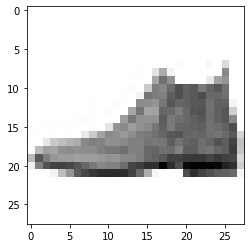

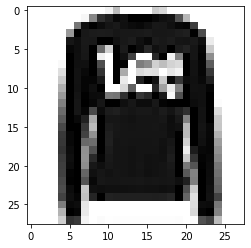

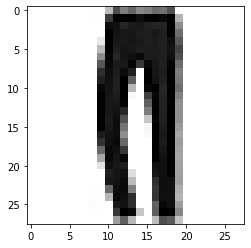

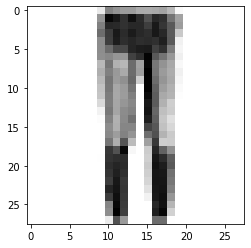

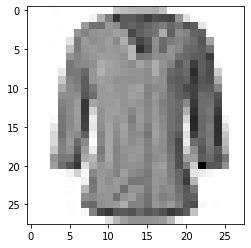

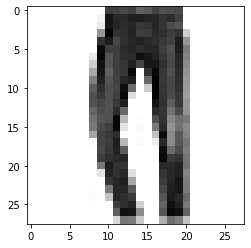

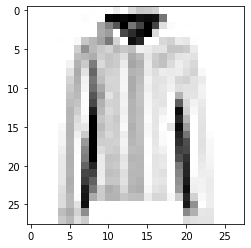

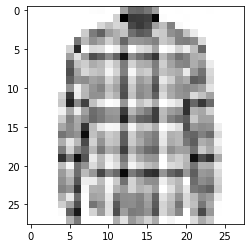

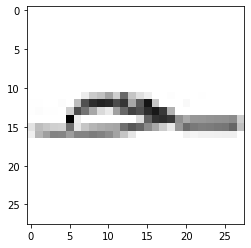

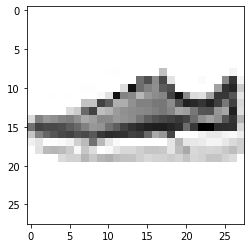

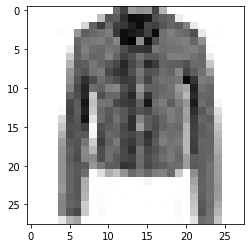

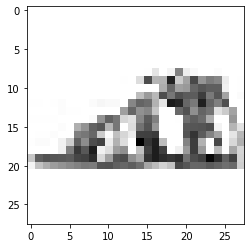

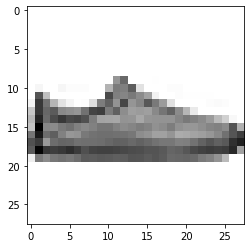

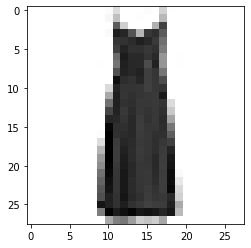

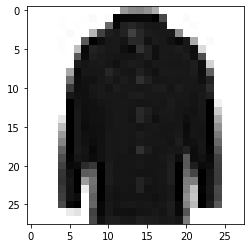

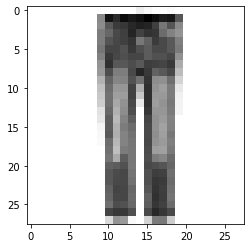

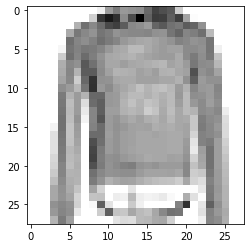

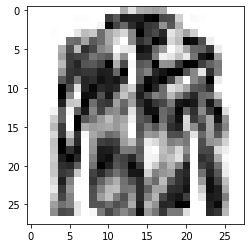

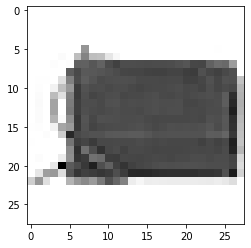

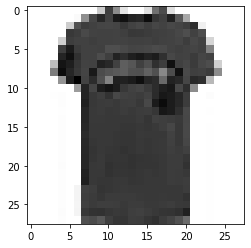

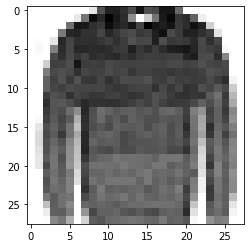

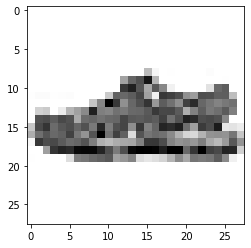

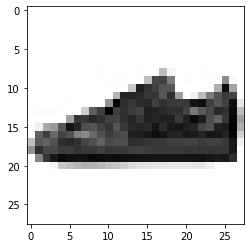

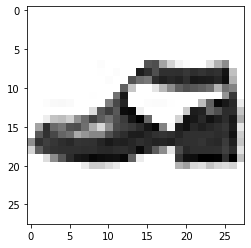

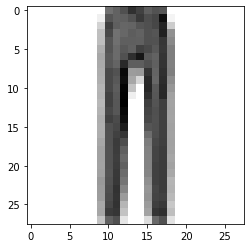

In [ ]:
imagefile = '/content/t10k-images-idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
for i in range(0,25):
  plt.imshow(imagearray[i], cmap=plt.cm.binary)
  plt.show()

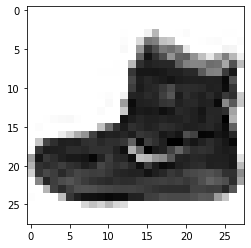

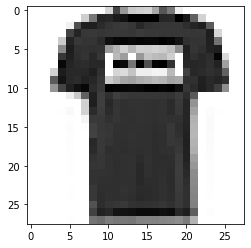

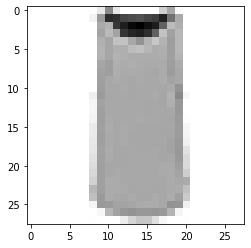

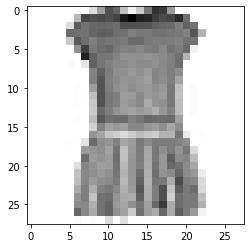

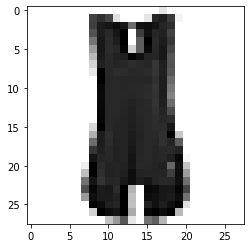

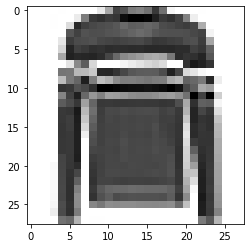

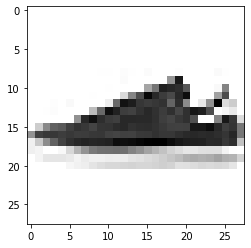

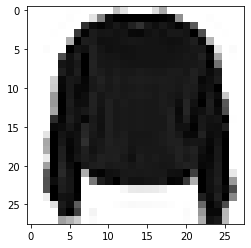

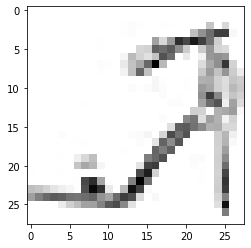

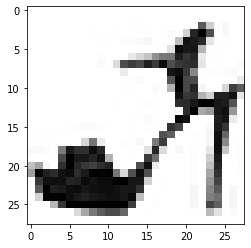

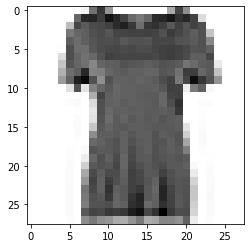

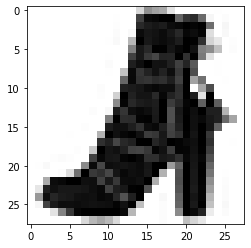

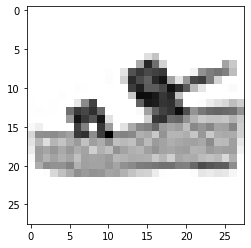

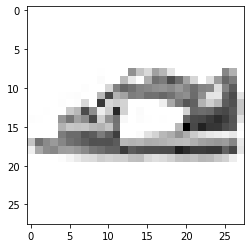

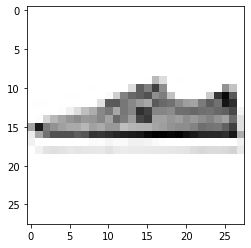

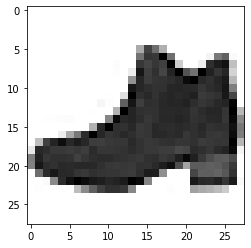

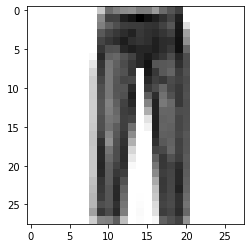

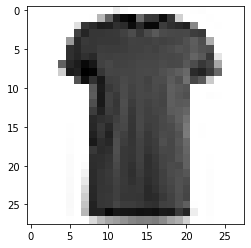

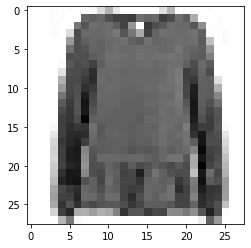

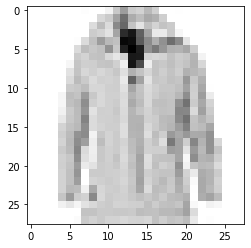

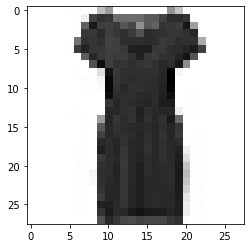

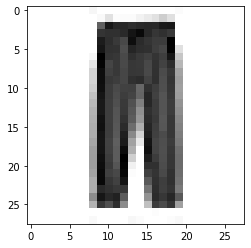

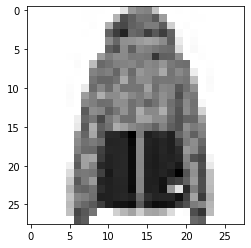

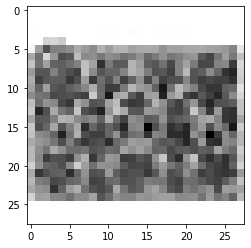

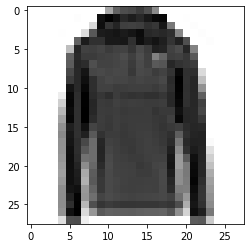

In [ ]:
imagefile = '/content/train-images-idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
for i in range(0,25):
  plt.imshow(imagearray[i], cmap=plt.cm.binary)
  plt.show()

#**Convolutional Neural Networks**
Building a Convolutional Neural Network is one of the simplest ways to create and use Deep Neural networks.

CNN is used because it has a variety of layers and filters that can hold image pixels and deliver pertinent data to the computers for categorization.

Using the sequential class from Keras hepls us enables to build any deep model layer by layer with their weights correlating to one another, we build the model.

1. What is Conv2D class?

>In order to generate a tensor of outputs, this layer generates a convolution kernel, which is convolved with the layer input hence we always mention the input shape in the first layer to give it a sense of direction or reference.
>
>**a)Filters:** Any random number of filters may exist. Simply adding extra kernels to that layer will solve the problem. On each channel of the input, a separate convolution is performed by each filter. Therefore, 32 filters perform 32 distinct convolutions on each of the input's RGB channels.
>
>**b)kernel_size:**The kernel size, a 2-tuple indicating the width and height of the 2D convolution window, is the second necessary parameter you must supply to the Keras Conv2D class.
>
>**c)activiation:** When making predictions with simpler mathematical processes, an activation function will determine whether or not the neuron's input to the network matters. Methods like relu, softmax and sigmoid are some of type of activation functions.


2. What is MaxPooling?

>The goal is to reduce the dimensionality of an input representation (such as an image or hidden-layer output matrix) through downsampling in order to make assumptions about its characteristics.

3. What is Dropout?

>The goal of dropout is to prevent overfitting and make your network generalize. The network must rely on the connections that already exist since neurons from the current layer will randomly detach from neurons in the following layer with probability p.


In [ ]:
from keras import layers, models, optimizers

def getModel():  
  Input_layer = layers.Input((28,28,1))
    
    # Add the convolutional Layer
  conv_layer = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(Input_layer)

    # Add the pooling Layer
  pooling_layer = layers.MaxPool2D(pool_size= 2)(conv_layer)

    # Add the dropout Layer 
  dropout_layer = layers.Dropout(0.2)(pooling_layer)

    # Add the output Layers
  output_layer = layers.Flatten()(dropout_layer)
  output_layer1 = layers.Dense(32, activation="relu")(output_layer)
  # output_layer1 = layers.Dropout(0.25)(output_layer1)
  output_layer2 = layers.Dense(10, activation="softmax")(output_layer1)

    # Compile the model
  cnn_model = models.Model(inputs=  Input_layer, outputs=output_layer2)
  cnn_model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy')

  return cnn_model

In this step we are importing the layers, models and optimizers entities from the keras library and we are defining a function called getmodel

After this we are adding the layers into our deep learning model

Once that is done we are compiling the model which in turn returns the cnn_model

In [ ]:
classifier = getModel()

What is tensorboard?
>In machine learning, it's frequently necessary to be able to measure something in order to improve it. The measurements and visualizations required for the machine learning workflow can be provided via TensorBoard. It makes it possible to visualize the model graph, follow experiment metrics like loss and accuracy, project embeddings into a lower dimensional space, and do a lot more.


What is optimizers?
>An optimizer is a procedure or method that alters neural network properties like weights and learning rates. As a result, it aids in decreasing total loss and raising precision.

>A deep learning model typically has millions of parameters, making the task of selecting the proper weights for the model challenging. It highlights the importance to select an optimization algorithm that is appropriate for your application. Therefore, before delving deeply into the subject, it is vital to comprehend these algorithms.

>To modify your weights and learning rate in deep learning, employ several optimizers. The optimal optimizer to use, though, depends on the application.

In [ ]:
from tensorflow.keras.optimizers import SGD
tensorboard = TensorBoard(
    log_dir=r'logs\{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)
opt = SGD(lr=0.01, momentum=0.9)
classifier.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
classifier.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                             

This step gives us the summary of layers trained In keras, non-trainable parameters (as shown in classifier.summary()) means the number of weights that are not updated during training, Weights are the values inside the network that perform the operations and can be adjusted to result in what we want (3)

In [ ]:
history = classifier.fit(
    x_train, y_train, batch_size=170,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
)

Epoch 1/10
283/283 [==============================] - 38s 132ms/step - loss: 0.7705 - accuracy: 0.7245 - val_loss: 0.5159 - val_accuracy: 0.8133
Epoch 2/10
283/283 [==============================] - 25s 88ms/step - loss: 0.4976 - accuracy: 0.8197 - val_loss: 0.4307 - val_accuracy: 0.8489
Epoch 3/10
283/283 [==============================] - 25s 88ms/step - loss: 0.4260 - accuracy: 0.8490 - val_loss: 0.3808 - val_accuracy: 0.8672
Epoch 4/10
283/283 [==============================] - 25s 88ms/step - loss: 0.3879 - accuracy: 0.8620 - val_loss: 0.3572 - val_accuracy: 0.8773
Epoch 5/10
283/283 [==============================] - 26s 91ms/step - loss: 0.3605 - accuracy: 0.8716 - val_loss: 0.3311 - val_accuracy: 0.8850
Epoch 6/10
283/283 [==============================] - 24s 83ms/step - loss: 0.3375 - accuracy: 0.8798 - val_loss: 0.3290 - val_accuracy: 0.8818
Epoch 7/10
283/283 [==============================] - 24s 83ms/step - loss: 0.3253 - accuracy: 0.8845 - val_loss: 0.3047 - val_accuracy

X: input data, as a numpy array. y: labels, as a numpy array. batch_size: A hyperparameter called batch size specifies how many samples must be processed before the internal model parameters are changed.

epoch:Every sample in the training dataset has had a chance to update the internal model parameters once during an epoch. One or more batches make up an epoch.

verbose: 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch.

sample_weight: sample weights, as a numpy array.(4)

In [ ]:
score = classifier.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print('test accuracy: {:.4f}'.format(score[1]))

test loss: 0.2897
test accuracy: 0.8952


313/313 [==============================] - 2s 7ms/step


Text(0.5, 1.0, 'confusion_matrix')

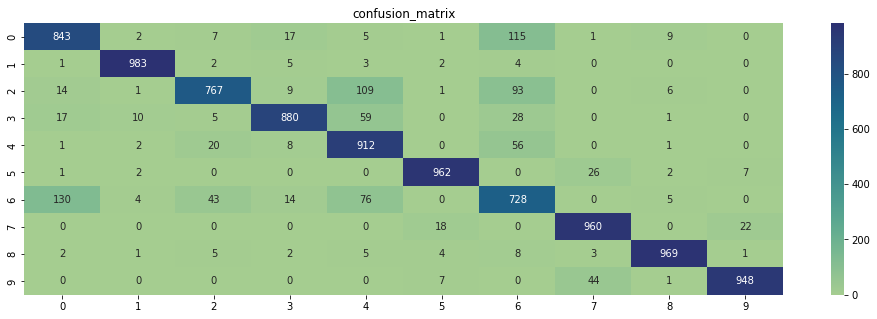

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, ax = plt.subplots(figsize=(17, 5))

pred = np.argmax(classifier.predict(x_test), axis=1)
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='crest', ax = ax, fmt=".0f")
ax.set_title("confusion_matrix")

    Labels:
    0 -> T-shirt
    1 -> Trouser
    2 -> Pullover
    3 -> Dress
    4 -> Coat
    5 -> Sandals
    6 -> Shirt
    7 -> Sneaker
    8 -> Bag
    9 -> Ankle Boots

As you can see from the confusion matrix that many T-shirts are mistakenly labeled as shirts and shirts that were mistakenly labeled as coats and pullovers.

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"RMSE: {score}")
print("accuracy score =" ,accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

RMSE: 1.247517534946904
accuracy score = 0.8952
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1000
         1.0       0.98      0.98      0.98      1000
         2.0       0.90      0.77      0.83      1000
         3.0       0.94      0.88      0.91      1000
         4.0       0.78      0.91      0.84      1000
         5.0       0.97      0.96      0.96      1000
         6.0       0.71      0.73      0.72      1000
         7.0       0.93      0.96      0.94      1000
         8.0       0.97      0.97      0.97      1000
         9.0       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
print("y_test shape :",y_test.shape)
print("y_test[199] :" ,y_test[199])


y_test shape : (10000,)
y_test[199] : 9.0


In [ ]:
print("pred shape :",pred.shape)
print("pred[199] :" ,pred[199])

pred shape : (10000,)
pred[199] : 9


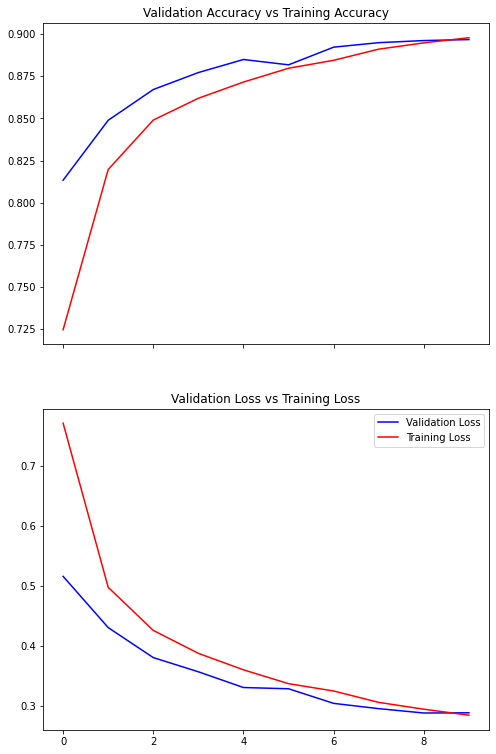

In [ ]:

fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (8,13))

ax[0].plot(history.history['val_accuracy'], c = 'b', label = 'Validation_accuracy')
ax[0].plot(history.history['accuracy'], c = 'r', label = 'Training accuracy')
ax[0].set_title('Validation Accuracy vs Training Accuracy')

ax[1].plot(history.history['val_loss'], c = 'b', label = 'Validation Loss')
ax[1].plot(history.history['loss'], c = 'r', label = 'Training Loss')
ax[1].set_title('Validation Loss vs Training Loss')

plt.legend()

References:
[1] https://victorzhou.com/blog/keras-cnn-tutorial/

[1] https://victorzhou.com/blog/intro-to-cnns-part-1/

[1] https://www.activestate.com/resources/quick-reads/what-is-a-keras-model/

[2] https://www.tensorflow.org/guide/keras/sequential_model

[2] https://medium.com/@cdabakoglu/
what-is-convolutional-neural-network-cnn-with-keras-cab447ad204c

[3] https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html

[3] https://elitedatascience.com/keras-tutorial-deep-learning-in-python

[3] https://medium.com/@julie.yin/understanding-the-data-splitting-functions-in-scikit-learn-9ae4046fbd26

[4] https://stackoverflow.com/questions/58081284/what-does-reshape60000-28-28-1-mean

[4] https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy

[4] https://keras.io/api/models/model_training_apis/



#**Transfer Learning**

>In transfer learning, we work with pre-trained features and apply them to various applications, machine learning models, and other things.

>In other words, it is a machine learning technique where we use a previously trained model as the foundation for a model on a new problem.

>Simply expressed, an optimization that enables quick progress when modeling the second task is applied to a model that was trained on the first, unrelated job.

>One can attain considerably better performance than training with only a modest quantity of data by applying transfer learning to a new task.
It is uncommon to train a model from scratch for tasks linked to image or natural language processing because transfer learning is so widespread.

>Instead, data scientists and academics prefer to begin with a model that has already been trained to recognize general properties in photos, such as edges and forms, and to classify things.

>Transfer learning models outperform conventional ML models in terms of performance. The reason for this is that the models that use information (features, weights, etc.) from previously trained models already have a thorough understanding of the features. It expedites the process compared to building neural networks from scratch.

>Various transfer learning approaches and methodologies are used depending on the application's domain, the task at hand, and the data's accessibility.
It is essential to know the answers to the following questions before choosing a transfer learning strategy:

>1. What knowledge can be passed from the source to the target to enhance how well the target task is performed?

>2. When should one transfer and when shouldn't one, in order to enhance and not damage the performance or results of the target task?

>3. How can we apply the knowledge we learned from the source model to our current project/domain?

>


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
getModel().layers

**Training the new layers with our old model**.

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation, MaxPool2D, Dropout
from tensorflow.keras import Sequential

new_model = Sequential(getModel().layers[:6])

# we just have to add the dense layers
new_model.add(Dense(128))
new_model.add(Activation("relu"))
new_model.add(Dense(10))
new_model.add(Activation("softmax"))

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                173088    
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                        

In [ ]:
new_model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = opt, 
                metrics = ['accuracy'])

In [ ]:
history_tl =new_model.fit(x_train, y_train, 
         validation_data = (x_validate, y_validate),
         epochs = 10,
         shuffle = True,
         batch_size = 170,
         verbose = 2)

Epoch 1/10
283/283 - 26s - loss: 0.8906 - accuracy: 0.6768 - val_loss: 0.5498 - val_accuracy: 0.7961 - 26s/epoch - 91ms/step
Epoch 2/10
283/283 - 21s - loss: 0.5130 - accuracy: 0.8148 - val_loss: 0.4357 - val_accuracy: 0.8430 - 21s/epoch - 76ms/step
Epoch 3/10
283/283 - 21s - loss: 0.4405 - accuracy: 0.8392 - val_loss: 0.4064 - val_accuracy: 0.8525 - 21s/epoch - 76ms/step
Epoch 4/10
283/283 - 21s - loss: 0.3915 - accuracy: 0.8595 - val_loss: 0.3542 - val_accuracy: 0.8730 - 21s/epoch - 76ms/step
Epoch 5/10
283/283 - 21s - loss: 0.3644 - accuracy: 0.8700 - val_loss: 0.3440 - val_accuracy: 0.8740 - 21s/epoch - 75ms/step
Epoch 6/10
283/283 - 21s - loss: 0.3379 - accuracy: 0.8782 - val_loss: 0.3240 - val_accuracy: 0.8817 - 21s/epoch - 76ms/step
Epoch 7/10
283/283 - 21s - loss: 0.3201 - accuracy: 0.8843 - val_loss: 0.3061 - val_accuracy: 0.8886 - 21s/epoch - 75ms/step
Epoch 8/10
283/283 - 21s - loss: 0.3058 - accuracy: 0.8897 - val_loss: 0.2919 - val_accuracy: 0.8932 - 21s/epoch - 75ms/step


In [ ]:
pred = np.argmax(new_model.predict(x_test), axis=1)

313/313 [==============================] - 2s 7ms/step


In [ ]:
print("accuracy score =" ,accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

accuracy score = 0.899
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84      1000
         1.0       0.97      0.98      0.98      1000
         2.0       0.85      0.85      0.85      1000
         3.0       0.90      0.92      0.91      1000
         4.0       0.87      0.87      0.87      1000
         5.0       0.99      0.94      0.97      1000
         6.0       0.79      0.65      0.72      1000
         7.0       0.89      0.99      0.93      1000
         8.0       0.95      0.98      0.97      1000
         9.0       0.98      0.92      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



313/313 [==============================] - 2s 8ms/step


Text(0.5, 1.0, 'confusion_matrix')

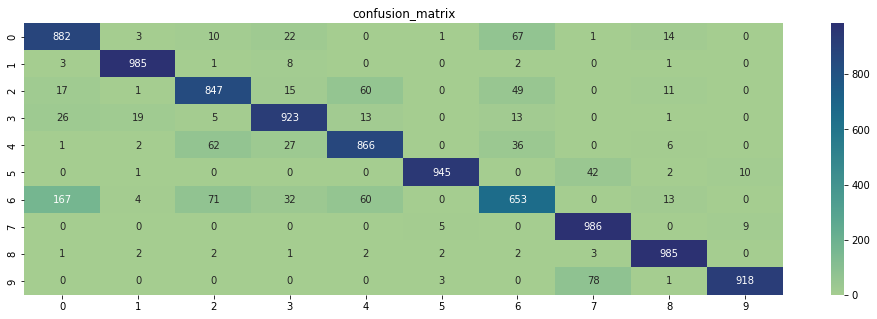

In [ ]:
fig, ax = plt.subplots(figsize=(17, 5))

pred = np.argmax(new_model.predict(x_test), axis=1)
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='crest', ax = ax, fmt=".0f")
ax.set_title("confusion_matrix")

In [ ]:
print("pred shape :",pred.shape)
print("pred[199] :" ,pred[199])

pred shape : (10000,)
pred[199] : 9


In [ ]:
print("pred shape :",y_test.shape)
print("pred[199] :" ,y_test[199])

pred shape : (10000,)
pred[199] : 9.0


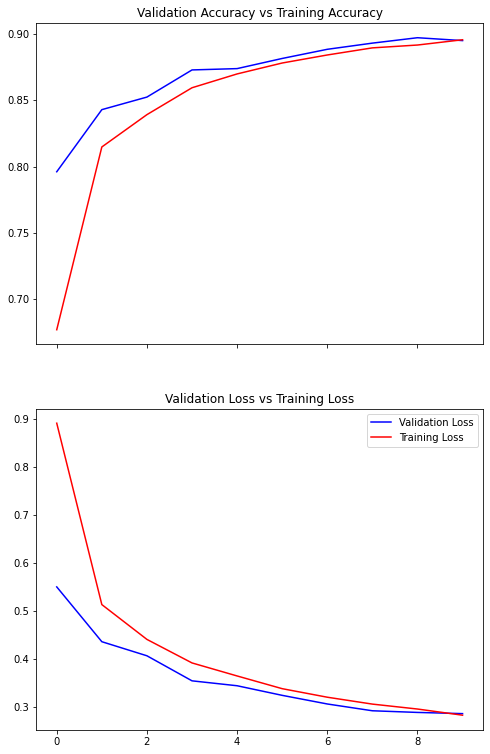

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (8,13))

ax[0].plot(history_tl.history['val_accuracy'], c = 'b', label = 'Validation_accuracy')
ax[0].plot(history_tl.history['accuracy'], c = 'r', label = 'Training accuracy')
ax[0].set_title('Validation Accuracy vs Training Accuracy')

ax[1].plot(history_tl.history['val_loss'], c = 'b', label = 'Validation Loss')
ax[1].plot(history_tl.history['loss'], c = 'r', label = 'Training Loss')
ax[1].set_title('Validation Loss vs Training Loss')

plt.legend()

    Conclusion: 
    We have used CNN model to train the transfer learning model to make it's accuracy better and hence as we can see, that transfer learning does
    give a better test accuracy. Hence, now we have a better model to train more data.  

References:

https://www.kaggle.com/code/rajeshwaris/transfer-learning-fashion-mnist-final
https://www.kaggle.com/code/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93/data
https://www.kaggle.com/code/rumbleftw/95-cnn-visualization-and-data-augmentation
https://www.kaggle.com/code/sharonkerketta/fashionmnist-functional-api-94-3-accuracy

https://stackoverflow.com/questions/55908188/this-model-has-not-yet-been-built-error-on-model-summary

https://stackoverflow.com/questions/32978575/how-to-fix-indexerror-invalid-index-to-scalar-variable

https://stackoverflow.com/questions/9532903/plot-is-not-defined

https://stackoverflow.com/questions/45003577/how-to-output-classification-report-of-sklearn-into-a-csv-file

https://stackoverflow.com/questions/53032754/python-sklearn-accuracy-score-name-not-defined

https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python

https://www.tensorflow.org/tensorboard/get_started

https://computersciencewiki.org/index.php/Max-pooling_/_Pooling

https://medium.com/analytics-vidhya/improving-accuracy-using-deep-learning-for-fashion-mnist-d7a3516af347

https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d

https://keras.io/api/layers/convolution_layers/convolution2d/

https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/

https://github.com/markjay4k/Fashion-MNIST-with-Keras/blob/master/Part%202%20-%20CNN%20fashion%20MNIST%20-%20basic%20CNN.ipynb

https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

https://keras.io/api/applications/




>>*the code takes 9 minutes and 33 seconds to run* 